##  | DATA ANALYSTICS   | 


# This dataset provides complete information approximately ride scheduling, logistics control, timing, distances, and elements influencing trip operations. It may be utilized for diverse analytical purposes, together with optimization, performance tracking, and decision-making in transportation or logistics domain names.# 
It also appears to contain  special information about trips, routes, timings, and probable elements affecting experience scheduling or logistics. It can be used for analysis, optimization, or tracking of transportation or logistical operations.# 
It is also the treasured to apprehend the this dataset is precious for information journey scheduling, tracking performance, and making decisions to enhance transportation and logistics performance. It's like having a roadmap to research and optimize how goods or human beings get from one location to some other.











## PROBLEM STATEMENT :
1. Delivery delay: The difference between start_scan_to_end_scan and od_end_time is usually large, indicating a delayed transport. We need to investigate the reasons for this delay (e.g., cutoff_factor) and develop ways to improve on-time delivery.
2. Route efficiency: Actual_distance_to_destination usually exceeds osrm_distance, indicating potential efficiency in route configuration. We need to analyze the detours and find ways to improve route choice based on real-time traffic data or driver behavior.
3. 
System accuracy: The difference between osrm_time and actual_time is large, indicating that the estimated travel time is inaccurate. We need to improve the accuracy of transportation planning by incorporating factors such as historical traffic patterns and unexpected events
4. 
Unknown delay factors: The cutoff_factor field lacks detail, making it difficult to trace the root cause of the delay. We need to fine tune the data we collect to capture the specific drivers of policy chang
5. .
Efficiency measurement ambiguity: The value of the factor domain is unclear. In order to better measure trip efficiency and driver performance, we need to define and standardize this ar
6. a.
Missing origin information: although source_center provides a common location, source_name is often missing, making it difficult to identify exact origin locations and optimize routes for urban segms




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_excel("esedata.xlsx")

In [3]:
data

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time
0,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,9,2018-09-20 04:27:55.000,10.435660,14,11,11.9653,1.272727,14,11
1,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,18,2018-09-20 04:17:55.000,18.936842,24,20,21.7243,1.200000,10,9
2,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,27,2018-09-20 04:01:19.506,27.637279,40,28,32.5395,1.428571,16,7
3,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,36,2018-09-20 03:39:57.000,36.118028,62,40,45.5620,1.550000,21,12
4,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,False,39,2018-09-20 03:33:55.000,39.386040,68,44,54.2181,1.545455,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-09-21 04:46:19.962,thanos::sroute:2edc34a2-67ac-406c-9490-0876ba9...,Carting,trip-153750517996169187,IND421302AAR,Mumbai_East_I_21 (Maharashtra),IND421004AAA,Mumbai_Ulhasngr_DC (Maharashtra),2018-09-21 04:46:19.962,2018-09-21 06:25:36.728,...,False,10,2018-09-21 05:29:56.000,10.918430,40,11,14.0229,3.636364,4,2
996,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Pataudi_DC (Haryana),2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,True,9,2018-09-19 09:08:08.000,11.171771,16,8,11.4112,2.000000,16,8
997,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Pataudi_DC (Haryana),2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,True,18,2018-09-19 08:46:30.000,19.611788,37,14,20.3352,2.642857,21,6
998,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Pataudi_DC (Haryana),2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,False,24,2018-09-19 08:34:33.469,24.474051,49,20,26.6704,2.450000,11,5


In [4]:
data.head()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time
0,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,9,2018-09-20 04:27:55.000,10.435660,14,11,11.9653,1.272727,14,11
1,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,18,2018-09-20 04:17:55.000,18.936842,24,20,21.7243,1.200000,10,9
2,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,27,2018-09-20 04:01:19.506,27.637279,40,28,32.5395,1.428571,16,7
3,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,36,2018-09-20 03:39:57.000,36.118028,62,40,45.5620,1.550000,21,12
4,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,False,39,2018-09-20 03:33:55.000,39.386040,68,44,54.2181,1.545455,6,5


In [5]:
data.tail()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time
995,2018-09-21 04:46:19.962,thanos::sroute:2edc34a2-67ac-406c-9490-0876ba9...,Carting,trip-153750517996169187,IND421302AAR,Mumbai_East_I_21 (Maharashtra),IND421004AAA,Mumbai_Ulhasngr_DC (Maharashtra),2018-09-21 04:46:19.962,2018-09-21 06:25:36.728,...,False,10,2018-09-21 05:29:56.000,10.918430,40,11,14.0229,3.636364,4,2
996,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Pataudi_DC (Haryana),2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,True,9,2018-09-19 09:08:08.000,11.171771,16,8,11.4112,2.000000,16,8
997,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Pataudi_DC (Haryana),2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,True,18,2018-09-19 08:46:30.000,19.611788,37,14,20.3352,2.642857,21,6
998,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Pataudi_DC (Haryana),2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,False,24,2018-09-19 08:34:33.469,24.474051,49,20,26.6704,2.450000,11,5
999,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122503AAA,Pataudi_DC (Haryana),IND122001AAA,GGN_DPC (Haryana),2018-09-19 09:45:58.494,2018-09-19 13:10:02.481,...,True,9,2018-09-19 11:14:09.000,10.210035,56,12,12.2342,4.666667,56,12


In [6]:
data=data.rename(columns={'trip_creation_time':"Creation_time_of_trip",'route_schedule_uuid': 'Route_schedule','route_type':'Route_type','trip_uuid':'Trip_id','source_center':'country_center'})

In [7]:
data.columns

Index(['Creation_time_of_trip', 'Route_schedule', 'Route_type', 'Trip_id',
       'country_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time'],
      dtype='object')

In [8]:


# Define a lambda function to extract text within brackets from a given string
extract_text_within_brackets = lambda text: text[text.find("(") + 1 : text.find(")")] if isinstance(text, str) else ''

# Apply the lambda function to the 'destination_name' column
data['destination_name'] = data['destination_name'].apply(extract_text_within_brackets)



In [9]:
data

,Creation_time_of_trip,Route_schedule,Route_type,Trip_id,country_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time
0,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,9,2018-09-20 04:27:55.000,10.435660,14,11,11.9653,1.272727,14,11
1,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,18,2018-09-20 04:17:55.000,18.936842,24,20,21.7243,1.200000,10,9
2,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,27,2018-09-20 04:01:19.506,27.637279,40,28,32.5395,1.428571,16,7
3,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,36,2018-09-20 03:39:57.000,36.118028,62,40,45.5620,1.550000,21,12
4,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,False,39,2018-09-20 03:33:55.000,39.386040,68,44,54.2181,1.545455,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-09-21 04:46:19.962,thanos::sroute:2edc34a2-67ac-406c-9490-0876ba9...,Carting,trip-153750517996169187,IND421302AAR,Mumbai_East_I_21 (Maharashtra),IND421004AAA,Maharashtra,2018-09-21 04:46:19.962,2018-09-21 06:25:36.728,...,False,10,2018-09-21 05:29:56.000,10.918430,40,11,14.0229,3.636364,4,2
996,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Haryana,2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,True,9,2018-09-19 09:08:08.000,11.171771,16,8,11.4112,2.000000,16,8
997,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Haryana,2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,True,18,2018-09-19 08:46:30.000,19.611788,37,14,20.3352,2.642857,21,6
998,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Haryana,2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,False,24,2018-09-19 08:34:33.469,24.474051,49,20,26.6704,2.450000,11,5


In [10]:
# section B

In [11]:
data

,Creation_time_of_trip,Route_schedule,Route_type,Trip_id,country_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time
0,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,9,2018-09-20 04:27:55.000,10.435660,14,11,11.9653,1.272727,14,11
1,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,18,2018-09-20 04:17:55.000,18.936842,24,20,21.7243,1.200000,10,9
2,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,27,2018-09-20 04:01:19.506,27.637279,40,28,32.5395,1.428571,16,7
3,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,True,36,2018-09-20 03:39:57.000,36.118028,62,40,45.5620,1.550000,21,12
4,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,False,39,2018-09-20 03:33:55.000,39.386040,68,44,54.2181,1.545455,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-09-21 04:46:19.962,thanos::sroute:2edc34a2-67ac-406c-9490-0876ba9...,Carting,trip-153750517996169187,IND421302AAR,Mumbai_East_I_21 (Maharashtra),IND421004AAA,Maharashtra,2018-09-21 04:46:19.962,2018-09-21 06:25:36.728,...,False,10,2018-09-21 05:29:56.000,10.918430,40,11,14.0229,3.636364,4,2
996,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Haryana,2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,True,9,2018-09-19 09:08:08.000,11.171771,16,8,11.4112,2.000000,16,8
997,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Haryana,2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,True,18,2018-09-19 08:46:30.000,19.611788,37,14,20.3352,2.642857,21,6
998,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Gurgaon_Central_D_15 (Haryana),IND122503AAA,Haryana,2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,False,24,2018-09-19 08:34:33.469,24.474051,49,20,26.6704,2.450000,11,5


In [12]:
#data_1 = data.drop(columns=['factor','is_cutoff','cutoff_factor','cutoff_timestamp'])
## Removing the columns which are taged as unknown discipline in information dictionary as we dont have any information about these columns and consequently cant be leveraged in analysis

In [13]:
num=[i for i in data.columns if data[i].dtypes=="int64"]

In [14]:
num

['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_time',
 'osrm_time',
 'segment_actual_time',
 'segment_osrm_time']

In [15]:
data[num]

,start_scan_to_end_scan,cutoff_factor,actual_time,osrm_time,segment_actual_time,segment_osrm_time
0,86,9,14,11,14,11
1,86,18,24,20,10,9
2,86,27,40,28,16,7
3,86,36,62,40,21,12
4,86,39,68,44,6,5
...,...,...,...,...,...,...
995,99,10,40,11,4,2
996,72,9,16,8,16,8
997,72,18,37,14,21,6
998,72,24,49,20,11,5


In [16]:
merge_rows = lambda row: ', '.join(str(value) for value in row if pd.notna(value))

# Apply the lambda function to the DataFrame along the columns axis
data['merged_column'] = data.apply(merge_rows, axis=1)



so by mearging these columns it is eaiser for us to to know the city the country and the and the id easily as it would be easier to the people checking for the id no they can easily be able to see the from where it dispatched and where it is gonna reach

<Axes: >

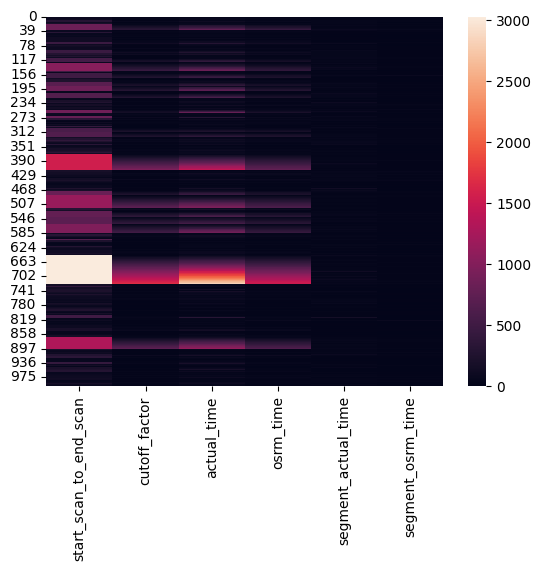

In [17]:
sns.heatmap(data[num])

In [18]:
extract_text_within_brackets = lambda text: text[text.find("(") + 1 : text.find(")")] if isinstance(text, str) else ''

# Apply the lambda function to the 'destination_name' column
data['source_name'] = data['source_name'].apply(extract_text_within_brackets)


In [19]:
data

,Creation_time_of_trip,Route_schedule,Route_type,Trip_id,country_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,merged_column
0,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Gujarat,IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,9,2018-09-20 04:27:55.000,10.435660,14,11,11.9653,1.272727,14,11,"2018-09-20 02:35:36.477000, thanos::sroute:eb7..."
1,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Gujarat,IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,18,2018-09-20 04:17:55.000,18.936842,24,20,21.7243,1.200000,10,9,"2018-09-20 02:35:36.477000, thanos::sroute:eb7..."
2,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Gujarat,IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,27,2018-09-20 04:01:19.506,27.637279,40,28,32.5395,1.428571,16,7,"2018-09-20 02:35:36.477000, thanos::sroute:eb7..."
3,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Gujarat,IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,36,2018-09-20 03:39:57.000,36.118028,62,40,45.5620,1.550000,21,12,"2018-09-20 02:35:36.477000, thanos::sroute:eb7..."
4,2018-09-20 02:35:36.477,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Gujarat,IND388620AAB,Gujarat,2018-09-20 03:21:32.419,2018-09-20 04:47:45.237,...,39,2018-09-20 03:33:55.000,39.386040,68,44,54.2181,1.545455,6,5,"2018-09-20 02:35:36.477000, thanos::sroute:eb7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-09-21 04:46:19.962,thanos::sroute:2edc34a2-67ac-406c-9490-0876ba9...,Carting,trip-153750517996169187,IND421302AAR,Maharashtra,IND421004AAA,Maharashtra,2018-09-21 04:46:19.962,2018-09-21 06:25:36.728,...,10,2018-09-21 05:29:56.000,10.918430,40,11,14.0229,3.636364,4,2,"2018-09-21 04:46:19.962000, thanos::sroute:2ed..."
996,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Haryana,IND122503AAA,Haryana,2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,9,2018-09-19 09:08:08.000,11.171771,16,8,11.4112,2.000000,16,8,"2018-09-19 07:33:57.136000, thanos::sroute:bc1..."
997,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Haryana,IND122503AAA,Haryana,2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,18,2018-09-19 08:46:30.000,19.611788,37,14,20.3352,2.642857,21,6,"2018-09-19 07:33:57.136000, thanos::sroute:bc1..."
998,2018-09-19 07:33:57.136,thanos::sroute:bc12c8fd-0eec-4b61-bbdd-8227614...,Carting,trip-153734243713535747,IND122002AAD,Haryana,IND122503AAA,Haryana,2018-09-19 08:32:58.577,2018-09-19 09:45:58.494,...,24,2018-09-19 08:34:33.469,24.474051,49,20,26.6704,2.450000,11,5,"2018-09-19 07:33:57.136000, thanos::sroute:bc1..."


In [20]:
output_file_path = 'cleaned esedata.csv'
data.to_csv(output_file_path, index=False)
print(f"\nProcessed data saved to {output_file_path}")


Processed data saved to cleaned esedata.csv


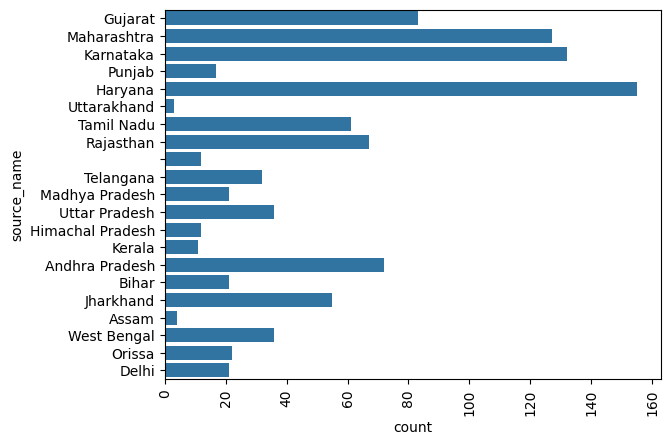

In [21]:
sns.countplot(y=data['source_name'])
plt.xticks(rotation=90)
plt.show()

the state haryana in more in the delivery state 
Trip purpose: Are trips originating from Haryana more likely to be a specific type, such as long-distance hauls or trips to congested areas?
Traffic conditions: Are there traffic bottlenecks or congestion issues that make trips originating from Haryana take longer?
Route types: Are trips from Haryana more likely to be indirect or take less efficient routes compared to other origins?

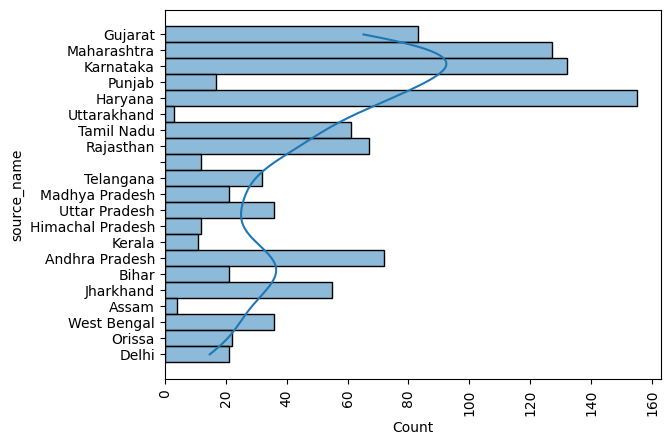

In [22]:
sns.histplot(data =data , y ='source_name', kde = True )
plt.xticks(rotation=90)
plt.show()

In this we can see that the haryana is the most leading in the delivery in the most of the it may contibute to te population or the origin of the centre


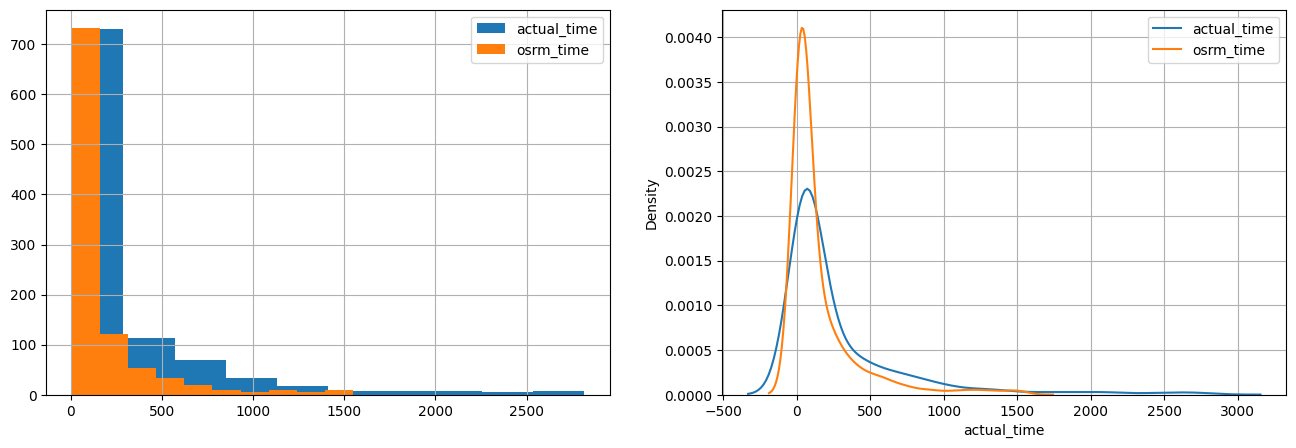

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.hist(data['actual_time'],bins=10,label='actual_time')
plt.hist(data['osrm_time'],bins=10,label='osrm_time')
plt.legend()
plt.grid()
plt.subplot(122)
sns.kdeplot(data['actual_time'],label='actual_time')
sns.kdeplot(data['osrm_time'],label='osrm_time')
plt.legend()
plt.grid()
plt.show()